In [1]:
import pandas as pd
df=pd.read_csv("carprices.csv")
df.head(5)

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [2]:
df.shape

(13, 4)

In [3]:
df.columns


Index(['Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)'], dtype='object')

In [6]:
df.isna()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [7]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [17]:
temp_df=pd.get_dummies(df)
temp_df

,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [62]:
final=temp_df.drop(['Car Model_Mercedez Benz C class'], axis='columns')
final=final.rename(columns ={"Age(yrs)": "Age"} )
final


,Mileage,Sell Price($),Age,Car Model_Audi A5,Car Model_BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [24]:
X=final.drop(['Sell Price($)'], axis='columns')
X

,Mileage,Age(yrs),Car Model_Audi A5,Car Model_BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [25]:
y=final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

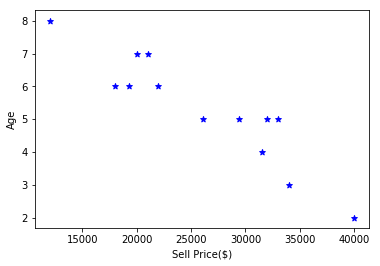

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.ylabel('Age')
plt.xlabel('Sell Price($)')
plt.scatter(df['Sell Price($)'],df['Age(yrs)'], color='blue',marker='*')

In [65]:
from sklearn.linear_model import LinearRegression 
reg=LinearRegression()
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
reg.score(X,y)

0.9417050937281083

In [71]:
reg.coef_

array([-3.70122094e-01, -1.33245363e+03, -2.45354074e+03, -6.73820733e+03])

In [72]:
reg.intercept_

58976.625968537235

In [ ]:
# Price of mercedez benz that is 4 yr old with mileage 45000

In [33]:
reg.predict([[45000,4,0,0]])

array([36991.31721061])

In [66]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [73]:
# To observe features relationship with y

reg.coef_

array([-3.70122094e-01, -1.33245363e+03, -2.45354074e+03, -6.73820733e+03])

ValueError: shapes (13,1) and (4,) not aligned: 1 (dim 1) != 4 (dim 0)

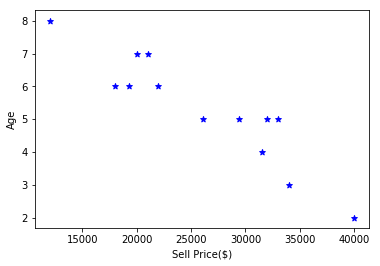

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.ylabel('Age')
plt.xlabel('Sell Price($)')
plt.scatter(df['Sell Price($)'],df['Age(yrs)'], color='blue',marker='*')
plt.scatter(reg.predict(df[['Sell Price($)']]),final.Age, color='red')